In [107]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
import numpy as np

In [52]:
data_path = '../../data/cleaned/UCB_dept_merge.csv'

In [56]:
date_columns = ['po_closed_date', 'creation_date']

In [57]:
data = pd.read_csv(data_path, parse_dates=date_columns)

In [25]:
%matplotlib inline

## Counts

In [115]:
count_cutoff = 1000
count_name = 'department_name'

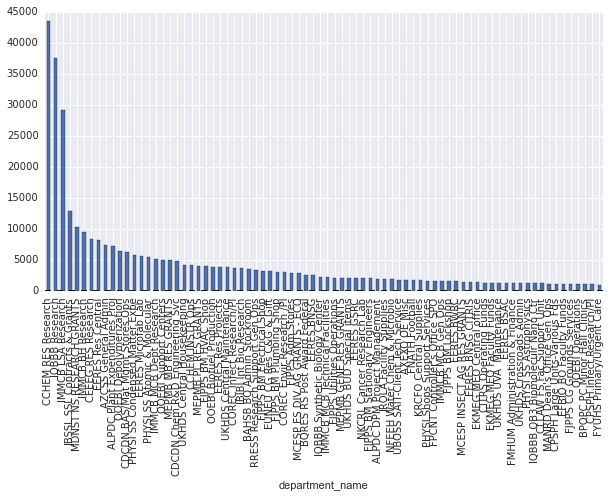

In [116]:
counts = data.groupby(count_name).count().iloc[:, 0].\
    sort(ascending=False, inplace=False)
counts[counts > count_cutoff].plot(kind='bar', figsize=(10, 5))

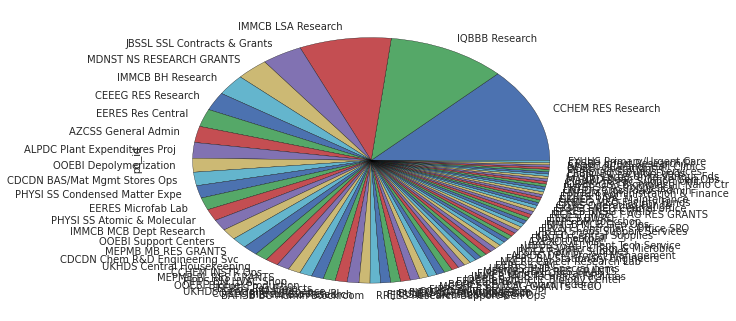

In [45]:
counts[counts > count_cutoff].plot(kind='pie')

## Time to complete

In [98]:
ndays = [i.days for i in data.days_to_close if not pd.isnull(i)]

In [101]:
data['days_to_close'] = data['po_closed_date'] - data['creation_date']
data['days_to_close'] = data['days_to_close'].astype('timedelta64[D]')

CPU times: user 37.6 ms, sys: 15.5 ms, total: 53.2 ms
Wall time: 50.9 ms


In [121]:
use_depts = counts[counts > 2000].index.values

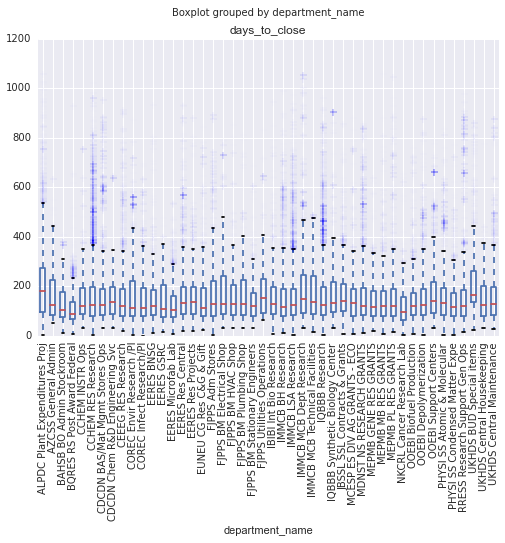

In [155]:
_ = data.query('department_name in @use_depts').\
    boxplot(column='days_to_close', by='department_name', rot=90)

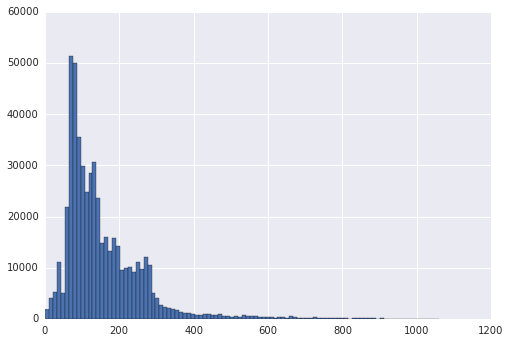

In [104]:
data.days_to_close.hist(bins=100)